In [121]:
import networkx as nx
import random
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import GridBox, Layout, interactive_output
from love import calculateODEMatrixVector
random.seed(0)

In [122]:
def random_starting_matrix():
    A = np.ones((4, 4))
    for i in range(4):
        for j in range(4):
            A[i, j] = random.uniform(-1, 1)
    return A

def random_starting_vector():
    A = np.ones((4))
    for i in range(4):
        A[i] = random.uniform(-1, 1)
    return A

def xy_starting_vector():
    A = np.zeros((4))
    return A

In [123]:
number_of_nodes = 10
G = nx.complete_graph(number_of_nodes)
nx.set_edge_attributes(G, [], "t")
nx.set_edge_attributes(G, [], "data")

In [124]:
# for each timestep t, 
#   probability of forming a connection p (bidirectional (someone meets a person)
#   probability of breaking a connection q (unidirectional (someone leaves a person, if love/hate relationship has no strong feelings

#initialize each node with the roamntic parameters (matrix and vector) for a different node
for i in range(number_of_nodes):
    for j in range(number_of_nodes):
        if (i != j):
            G.nodes[i][j] = [random_starting_matrix(), random_starting_vector(), xy_starting_vector()]

for i in range(number_of_nodes):
    for j in range(number_of_nodes):
        if (i != j):
            calculatedODE = calculateODEMatrixVector(G.nodes[i][j][0], G.nodes[i][j][1], G.nodes[i][j][2])
            G[i][j]["data"] = calculatedODE.y
            G[i][j]["t"] = calculatedODE.t
            # G.set_edge_data(i, j, "data", calculatedODE.y)
            # G.set_edge_data(i, j, "t", calculatedODE.t)
            

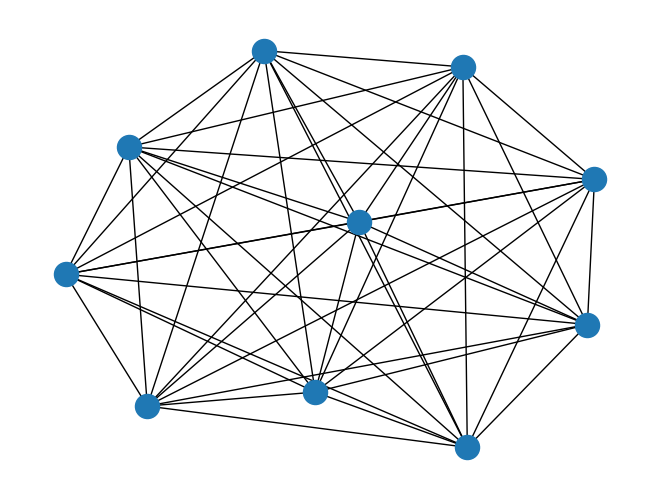

In [125]:
nx.draw(G)